In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
import re
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# plt.style.use('dark_background')


In [29]:
# !gdown 1grl9yOxAkkOBd6IPlxcW5yHklRKVU1R3

In [30]:
marketing_campaign = pd.read_csv('marketing_campaign.csv', sep = '\t')
marketing_campaign.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [31]:
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [32]:
marketing_campaign.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

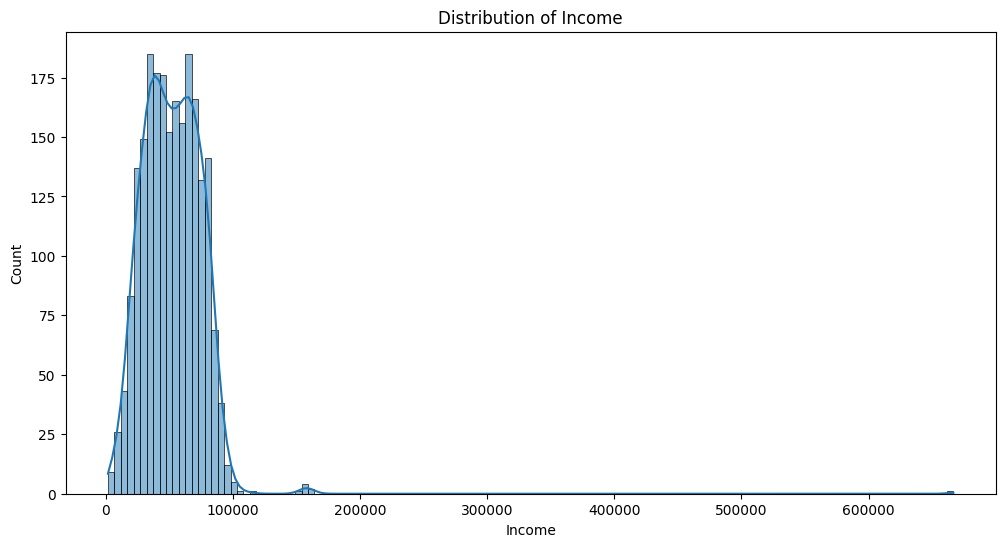

Column: Income
1975
Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64
--------------------


In [33]:
# prompt: distributo=ion graph of marketing_campaign['Income']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(marketing_campaign['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

col = 'Income'
print(f"Column: {col}")
print(len(marketing_campaign[col].unique()))
print(marketing_campaign[col].value_counts())
print("-" * 20)


In [34]:
marketing_campaign['Income'].mean()

52247.25135379061

In [35]:
arr = marketing_campaign['Income'].unique()
t = arr[~np.isnan(arr)].mean()
t

52608.250253292805

<ipython-input-36-6919e6e8e475>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_campaign['Income'].fillna(t, inplace = True)


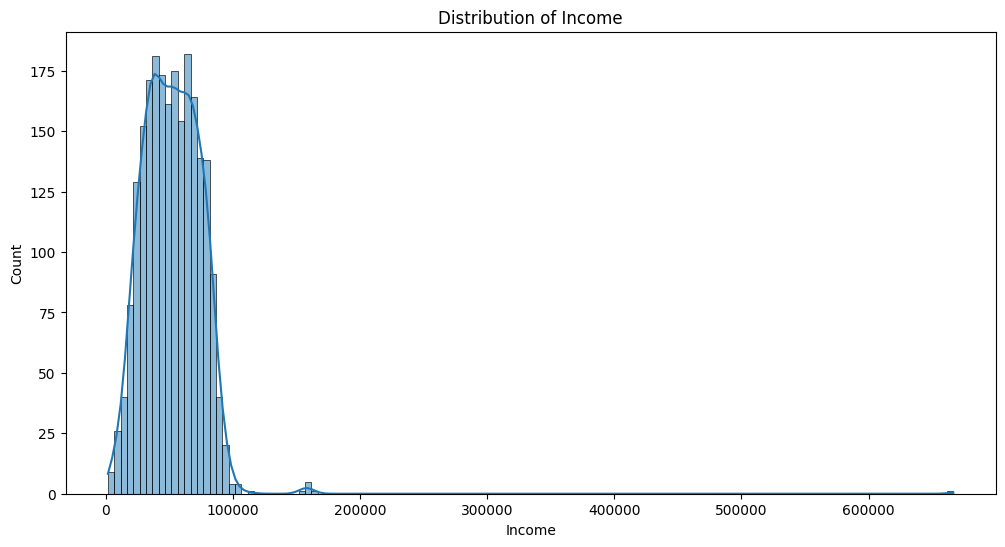

Column: Income
1975
Income
52608.250253    24
7500.000000     12
35860.000000     4
37760.000000     3
83844.000000     3
                ..
40760.000000     1
41452.000000     1
6835.000000      1
33622.000000     1
52869.000000     1
Name: count, Length: 1975, dtype: int64
--------------------


In [36]:
marketing_campaign['Income'].fillna(t, inplace = True)
marketing_campaign['Income'].astype(int)

plt.figure(figsize=(12, 6))
sns.histplot(marketing_campaign['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

col = 'Income'
print(f"Column: {col}")
print(len(marketing_campaign[col].unique()))
print(marketing_campaign[col].value_counts())
print("-" * 20)

In [37]:
# prompt: unique values in all columns and frequencies

for col in marketing_campaign.columns:
    print(f"Column: {col}")
    print(len(marketing_campaign[col].unique()))
    print(marketing_campaign[col].value_counts())
    print("-" * 20)

Column: Year_Birth
59
Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64
--------------------
Column: Education
5
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
--------------------
Column: Marital_Status
8
Marital_Status
Married     864
Together    580
Single      480
Divorced   

# Preprocessing

In [38]:
marketing_campaign_prep = marketing_campaign.copy()

In [39]:
CatColumnsToNum = ['Education', 'Marital_Status', 'Dt_Customer']
for col in CatColumnsToNum:
    marketing_campaign_prep[col]=pd.factorize(marketing_campaign_prep[col])[0]

# K-Means

In [40]:
marketing_campaign_km = marketing_campaign_prep.copy()

In [41]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# standardized_marketing_campaign_km = StandardScaler().fit_transform(marketing_campaign_km)
# print(standardized_marketing_campaign_km.shape)

# pca_2 = PCA(n_components=2)

# pca_2.fit(standardized_marketing_campaign_km)

# pca2_transformed_data = pca_2.transform(standardized_marketing_campaign_km)

# print(pca2_transformed_data.shape)



In [42]:
# Step 1: Standardize the marketing campaign data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(marketing_campaign_km)
print("Shape of standardized data:", standardized_data.shape)

# Step 2: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca.fit(standardized_data)
reduced_data = pca.transform(standardized_data)
print("Shape of PCA-transformed data:", reduced_data.shape)

Shape of standardized data: (2240, 26)
Shape of PCA-transformed data: (2240, 2)


In [43]:
# pca2_transformed_data
reduced_data

array([[ 3.7509585 , -0.34183919],
       [-2.38136526,  0.00918409],
       [ 1.61644132, -0.02002867],
       ...,
       [ 1.53462017,  0.26931873],
       [ 1.7029696 ,  1.12698279],
       [-1.67470193,  0.75690803]])

In [44]:
# class KMeansClustering:
#     def __init__(self, dataset, num_clusters):
#         self.K = num_clusters
#         self.max_iterations = 100
#         self.num_examples,self.num_features = dataset.shape

#     def initialize_random_centroids(self, dataset):
#         centroids = np.zeros((self.K, self.num_features))
#         for k in range(self.K):
#             centroid = dataset[np.random.choice(range(self.num_examples))]
#             centroids[k] = centroid
#         return centroids

#     def create_cluster(self, dataset, centroids):
#         clusters = [[] for _ in range(self.K)]
#         for point_idx, point in enumerate(dataset):
#             closest_centroid = np.argmin(
#                 np.sqrt(np.sum((point-centroids)**2, axis=1))
#             )
#             clusters[closest_centroid].append(point_idx)
#         return clusters

#     def calculate_new_centroids(self, cluster, dataset):
#         centroids = np.zeros((self.K, self.num_features))
#         for idx, cluster in enumerate(cluster):
#             new_centroid = np.mean(dataset[cluster], axis=0)
#             centroids[idx] = new_centroid
#         return centroids

#     def predict_cluster(self, clusters, dataset):
#         y_pred = np.zeros(self.num_examples)
#         for cluster_idx, cluster in enumerate(clusters):
#             for sample_idx in cluster:
#                 y_pred[sample_idx] = cluster_idx
#         return y_pred

#     def fit(self, dataset):
#         centroids = self.initialize_random_centroids(dataset)
#         for _ in range(self.max_iterations):
#             clusters = self.create_cluster(dataset, centroids)
#             previous_centroids = centroids
#             centroids = self.calculate_new_centroids(clusters, dataset)
#             diff = centroids - previous_centroids
#             if not diff.any():
#                 break
#         y_pred = self.predict_cluster(clusters, dataset)
#         return centroids,y_pred

# KMeansClustering class definition
class KMeansClustering:
    def __init__(self, data, num_clusters):
        self.num_clusters = num_clusters
        self.max_iterations = 100
        self.num_samples, self.num_features = data.shape

    def initialize_random_centroids(self, data):
        centroids = np.zeros((self.num_clusters, self.num_features))
        for i in range(self.num_clusters):
            centroids[i] = data[np.random.choice(self.num_samples)]
        return centroids

    def create_clusters(self, data, centroids):
        clusters = [[] for _ in range(self.num_clusters)]
        for index, sample in enumerate(data):
            closest_centroid = np.argmin(np.sqrt(np.sum((sample - centroids) ** 2, axis=1)))
            clusters[closest_centroid].append(index)
        return clusters

    def calculate_new_centroids(self, clusters, data):
        centroids = np.zeros((self.num_clusters, self.num_features))
        for idx, cluster in enumerate(clusters):
            centroids[idx] = np.mean(data[cluster], axis=0)
        return centroids

    def predict_cluster_labels(self, clusters):
        labels = np.zeros(self.num_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def fit(self, data):
        centroids = self.initialize_random_centroids(data)
        for _ in range(self.max_iterations):
            clusters = self.create_clusters(data, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, data)
            if np.allclose(centroids, previous_centroids):
                break
        labels = self.predict_cluster_labels(clusters)
        return centroids, labels

In [45]:
# import plotly.express as px
# kmeans = KMeansClustering(pca2_transformed_data,2)
# centroids,y_pred=kmeans.fit(pca2_transformed_data)
# x = pca2_transformed_data[:, 0]
# y = pca2_transformed_data[:, 1]

# plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)  # plot different colors per cluster
# plt.title('Marketing clusters')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

# cpx = [a[0] for a in centroids]
# cpy = [a[1] for a in centroids]
# plt.scatter(cpx, cpy, s=200, linewidths=1.5,
#             color='red', edgecolors="black")

# plt.show()

In [46]:
# import plotly.express as px
# kmeans = KMeansClustering(pca2_transformed_data,3)
# centroids,y_pred=kmeans.fit(pca2_transformed_data)
# x = pca2_transformed_data[:, 0]
# y = pca2_transformed_data[:, 1]

# plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)  # plot different colors per cluster
# plt.title('Marketing clusters')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

# cpx = [a[0] for a in centroids]
# cpy = [a[1] for a in centroids]
# plt.scatter(cpx, cpy, s=200, linewidths=1.5,
#             color='red', edgecolors="black")

# plt.show()

In [47]:
# kmeans = KMeansClustering(pca2_transformed_data,5)
# centroids,y_pred=kmeans.fit(pca2_transformed_data)
# x = pca2_transformed_data[:, 0]
# y = pca2_transformed_data[:, 1]

# plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)  # plot different colors per cluster
# plt.title('Marketing clusters')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

# cpx = [a[0] for a in centroids]
# cpy = [a[1] for a in centroids]
# plt.scatter(cpx, cpy, s=200, linewidths=1.5,
#             color='red', edgecolors="black")

# plt.show()

In [48]:
# kmeans = KMeansClustering(pca2_transformed_data,7)
# centroids,y_pred=kmeans.fit(pca2_transformed_data)
# x = pca2_transformed_data[:, 0]
# y = pca2_transformed_data[:, 1]

# plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)
# plt.title('Marketing clusters')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

# cpx = [a[0] for a in centroids]
# cpy = [a[1] for a in centroids]
# plt.scatter(cpx, cpy, s=200, linewidths=1.5,
#             color='red', edgecolors="black")

# plt.show()

In [49]:
# kmeans = KMeansClustering(pca2_transformed_data,9)
# centroids,y_pred=kmeans.fit(pca2_transformed_data)
# x = pca2_transformed_data[:, 0]
# y = pca2_transformed_data[:, 1]

# plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)
# plt.title('Marketing clusters')
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')

# cpx = [a[0] for a in centroids]
# cpy = [a[1] for a in centroids]
# plt.scatter(cpx, cpy, s=200, linewidths=1.5,
#             color='red', edgecolors="black")

# plt.show()

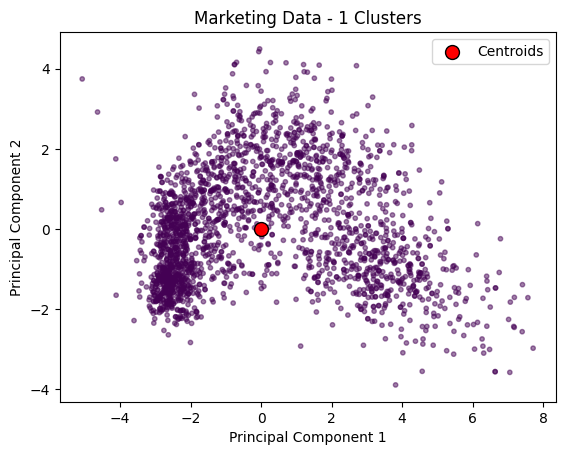

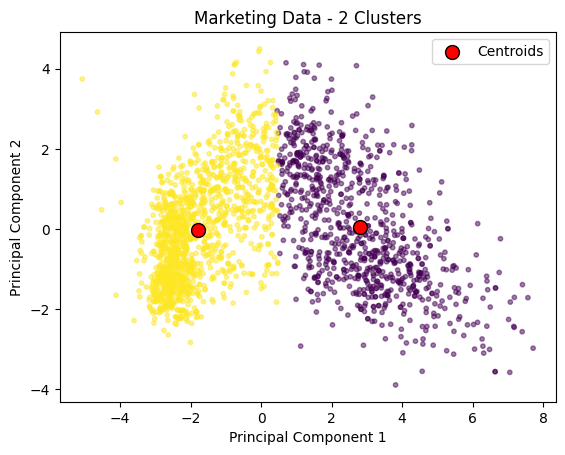

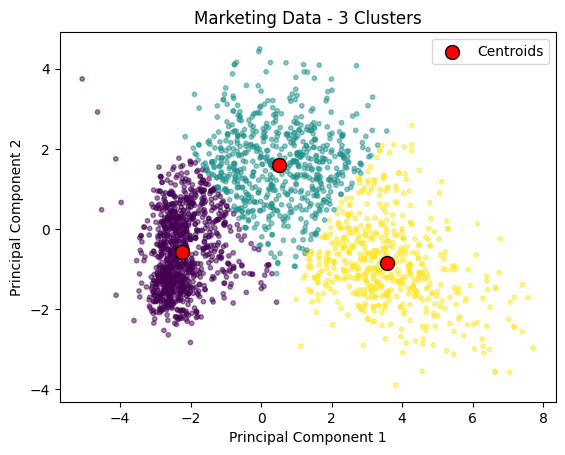

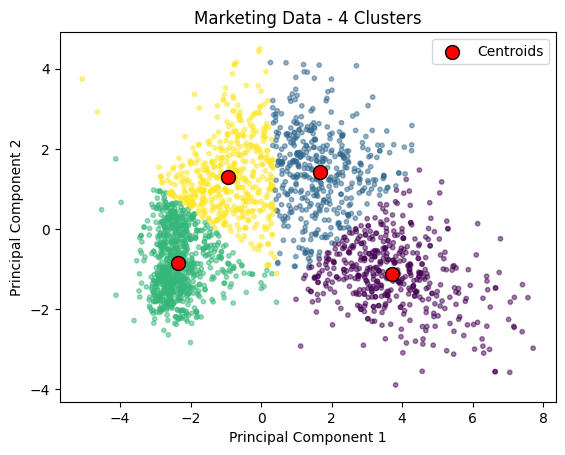

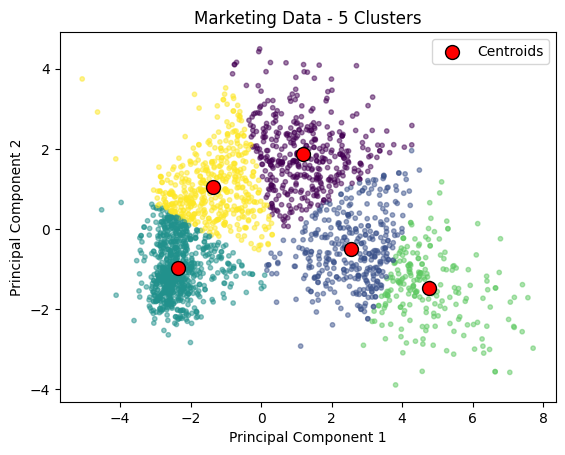

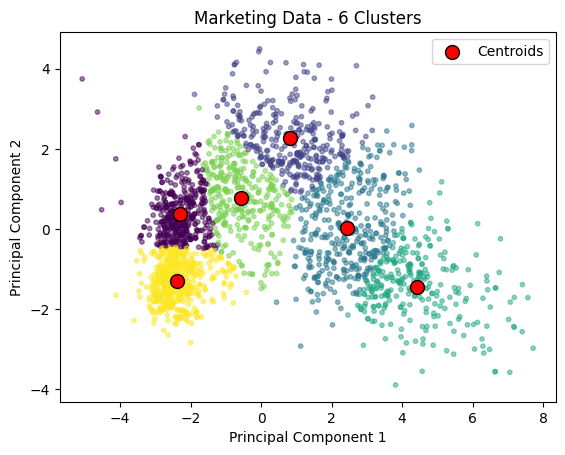

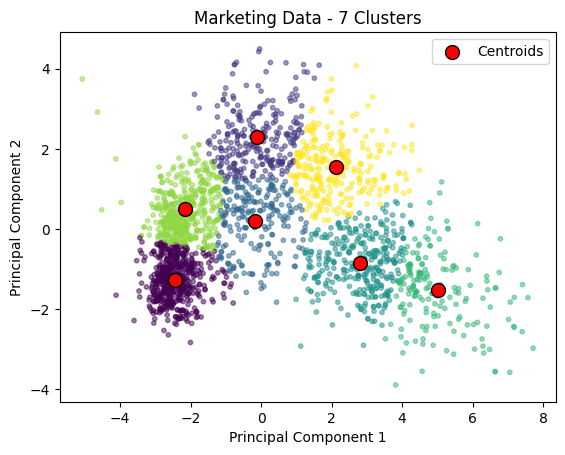

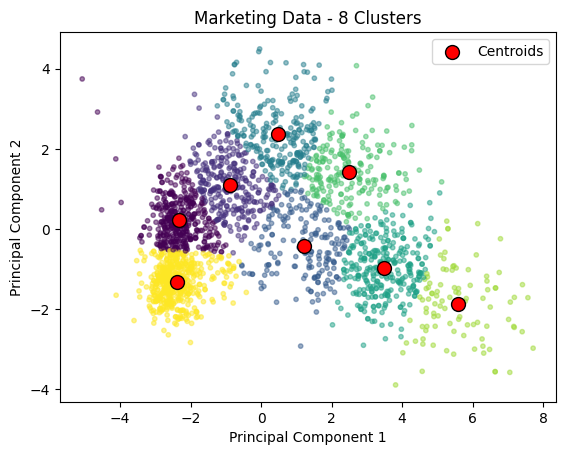

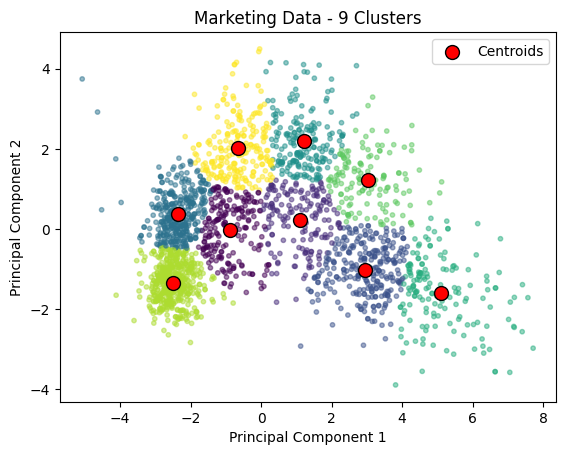

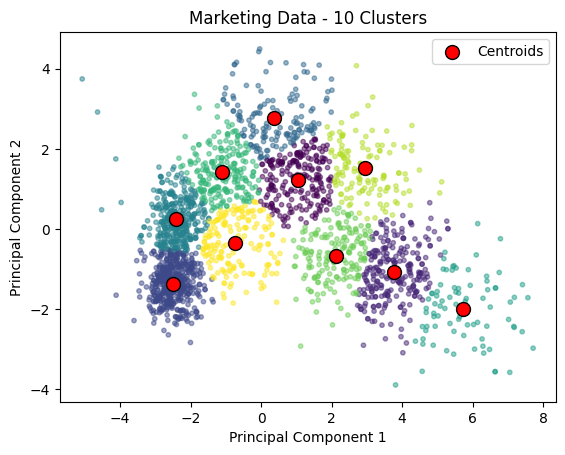

In [50]:
# for i in range(2,10):
#     kmeans = KMeansClustering(pca2_transformed_data,i)
#     centroids,y_pred=kmeans.fit(pca2_transformed_data)
#     x = pca2_transformed_data[:, 0]
#     y = pca2_transformed_data[:, 1]

#     plt.scatter(x, y, c=y_pred, alpha=0.5, s=10)
#     plt.title(f'Marketing {i} clusters')
#     plt.xlabel('PCA 1')
#     plt.ylabel('PCA 2')

#     cpx = [a[0] for a in centroids]
#     cpy = [a[1] for a in centroids]
#     plt.scatter(cpx, cpy, s=100, linewidths=1, color='red', edgecolors="black")

#     plt.show()

# Step 3: Apply K-means clustering and visualize results for 2 to 9 clusters
for num_clusters in range(1, 11):
    kmeans = KMeansClustering(reduced_data, num_clusters)
    centroids, labels = kmeans.fit(reduced_data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, alpha=0.5, s=10)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='red', edgecolor='black', label='Centroids')
    plt.title(f'Marketing Data - {num_clusters} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

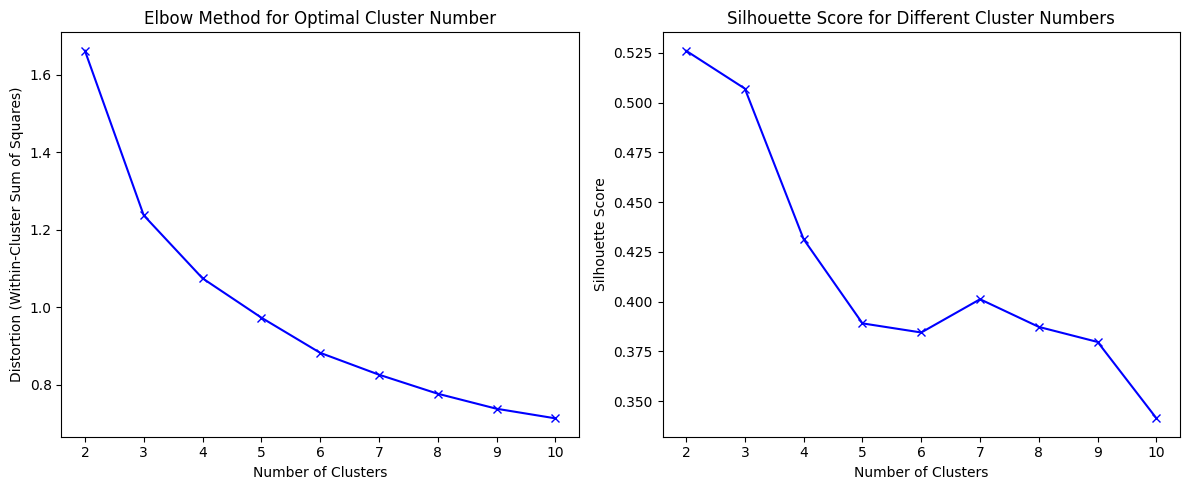

Distortions: [1.6625223825288666, 1.2371926468727332, 1.0744862980755105, 0.9728939821827617, 0.8819900035783663, 0.825500954120041, 0.7762934334499049, 0.7374824856325195, 0.7126843694114078]
Silhouette Scores: [0.5261372967004773, 0.5070879164738762, 0.43134673937593854, 0.38905705508983285, 0.38447083210964933, 0.4011914258373463, 0.38727192545361533, 0.37970599399704924, 0.3413096423365004]


In [52]:

# cluster_numbers = list(range(2, 10))
# #  [2, 3, 5, 7, 9]
# distortions = []
# silhouette_scores = []

# for num_clusters in cluster_numbers:
#     kmeans = KMeansClustering(pca2_transformed_data,num_clusters)

#     centroids, y_pred = kmeans.fit(pca2_transformed_data)

#     distortion = sum(np.min(cdist(pca2_transformed_data, centroids, 'euclidean'), axis=1)) / len(2 * pca2_transformed_data)
#     distortions.append(distortion)

#     silhouette_avg = metrics.silhouette_score(pca2_transformed_data, y_pred)
#     silhouette_scores.append(silhouette_avg)

# # elbow method
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.plot(cluster_numbers, distortions, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Distortion (Cost)')
# plt.title('The Elbow Method for Optimal Cluster Number')

# #silhouette scores
# plt.subplot(1, 2, 2)
# plt.plot(cluster_numbers, silhouette_scores, 'bx-')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score for Different Cluster Numbers')

# plt.tight_layout()
# plt.show()

# print(distortions)
# print(silhouette_scores)

# Step 4: Evaluate clustering with Elbow Method and Silhouette Score
cluster_range = list(range(2, 11))
distortions = []
silhouette_scores = []

for num_clusters in cluster_range:
    kmeans = KMeansClustering(reduced_data, num_clusters)
    centroids, labels = kmeans.fit(reduced_data)

    # Calculate distortion (within-cluster sum of squares)
    distortion = np.mean(np.min(cdist(reduced_data, centroids, 'euclidean'), axis=1))
    distortions.append(distortion)

    # Calculate silhouette score
    silhouette_avg = metrics.silhouette_score(reduced_data, labels)
    silhouette_scores.append(silhouette_avg)

# Print Distortions and Silhouette Scores
print("Distortions:", distortions)
print("Silhouette Scores:", silhouette_scores)

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method plot
plt.subplot(1, 2, 1)
plt.plot(cluster_range, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Cluster Number')

# Silhouette Score plot
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers')

plt.tight_layout()
plt.show()